In [1]:
# Importamos librerías importantes
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Creamos una lista que guardará las imágenes correspondientes a la primera secuencia 
path = glob.glob("seq1//seq1//*.jpg")
seq1 = [cv2.imread(file,0) for file in path]

(-0.5, 1279.5, 799.5, -0.5)

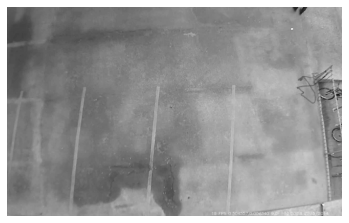

In [3]:
# Mostramos una imagen de prueba en escala de grises
a = seq1[0] 
plt.imshow(a,cmap='gray')
plt.axis('off')

(-0.5, 1279.5, 799.5, -0.5)

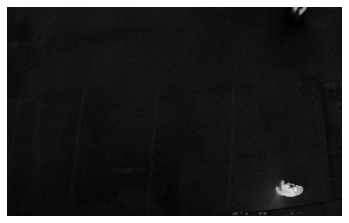

In [6]:
# Probamos la resta de dos imágenes para comprobar la detección de movimiento
d=abs(seq1[300].astype(float) - seq1[0].astype(float))
plt.imshow(d,cmap='gray')
plt.axis('off')

(-0.5, 1279.5, 799.5, -0.5)

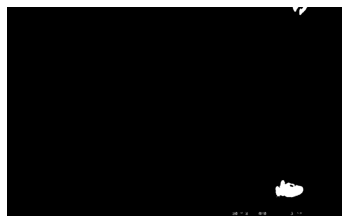

In [7]:
d.shape
d=abs(seq1[300].astype(float) - seq1[0].astype(float))
threshold = 50
for j in range(d.shape[1]):
    for i in range(d.shape[0]):
        if d[i][j]>threshold:
            d[i][j] = 255
        else:
            d[i][j] = 0
plt.imshow(d,cmap='gray')
plt.axis('off')

In [22]:
# Esta función calcula la diferencia de cuadros de toda la secuencia ingresada tomando un valor umbral definido por el usuario
def Frame_Diff(seq, threshold):
    Diff = []
    for i in range(1,len(seq)):
        Diff.append(abs(seq[i].astype(float) - seq[i-1].astype(float)))
    for k in range(len(Diff)):
        for j in range(Diff[k].shape[1]):
            for i in range(Diff[k].shape[0]):
                if (Diff[k])[i][j] > threshold:
                    (Diff[k])[i][j] = 255
                else:
                    (Diff[k])[i][j] = 0  
    return Diff

In [23]:
F_D_seq1 = Frame_Diff(seq1, 50)

(-0.5, 1279.5, 799.5, -0.5)

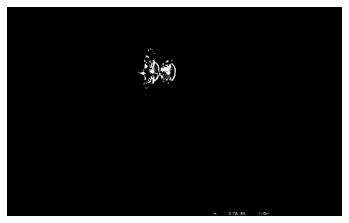

In [25]:
plt.imshow(F_D_seq1[13],cmap='gray')
plt.axis('off')

In [9]:
# Creamos una lista que guardará las imágenes correspondientes al fondo
path2 = glob.glob("fondo//fondo//*.jpg")
fondo = [cv2.imread(file,0) for file in path2]

Text(0.5, 1.0, 'desviación pixel a pixel del fondo')

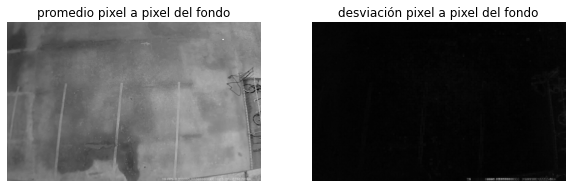

In [10]:
mean_fondo = np.mean(fondo, axis=0)
std_fondo = np.std(fondo, axis=0)
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1) 
plt.imshow(mean_fondo,cmap='gray')
plt.axis('off')
plt.title('promedio pixel a pixel del fondo')

fig.add_subplot(rows, columns, 2) 
plt.imshow(std_fondo,cmap='gray')
plt.axis('off')
plt.title('desviación pixel a pixel del fondo')

(-0.5, 1279.5, 799.5, -0.5)

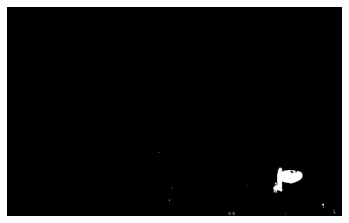

In [16]:
f = seq1[312]
M = np.zeros((f.shape[0],f.shape[1]))
threshold = 12
U1 = mean_fondo + threshold * (std_fondo + 1)
U2 = mean_fondo - threshold * (std_fondo + 1)
for j in range(f.shape[1]):
    for i in range(f.shape[0]):
        if ((f[i][j] > U1[i][j]) or (f[i][j] < U2[i][j])):
            M[i][j] += 255
        else: 
            pass

plt.imshow(M,cmap='gray')
plt.axis('off')

(-0.5, 1279.5, 799.5, -0.5)

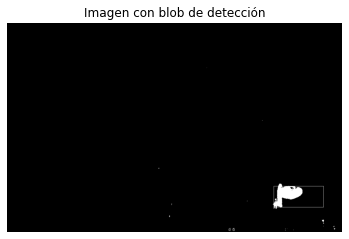

In [17]:
# Histogramas
Hist_cols = np.sum(M,axis=0)
Hist_rows = np.sum(M,axis=1)
x = []
y = []

for i in range(len(Hist_cols)):
    if Hist_cols[i] > 2.7*np.mean(Hist_cols):
        x.append(i)
    else:
        pass
for j in range(len(Hist_rows)):
    if Hist_rows[j] > 2.7*np.mean(Hist_rows):
        y.append(j)
    else:
        pass
minx = np.min(x)
maxx = np.max(x)
miny = np.min(y)
maxy = np.max(y)

cv2.rectangle(M,(minx,miny),(maxx,maxy),(255),1)

plt.imshow(M,cmap='gray')
plt.title('Imagen con blob de detección')
plt.axis('off')

In [ ]:
"""
El cuadro aún sale mal porque hay que definir de mejor manera Hist_cols[i] > 2.7*np.mean(Hist_cols) estas condiciones. Esto 
porque debido al ruido de la imagen (los puntitos blancos) el cuadro toma otro tamaño y encierra mas de lo debido
"""

In [13]:
np.max(Hist_cols)

23205.0